# Импорт библиотек и подключение драйва

In [143]:
import pandas as pd
import urllib
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import math

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# Загрузка датасета

In [ ]:
filename = 'ai_innopolis/Titanic-Dataset.csv'

In [ ]:
path = Path('/content/drive/MyDrive')
data_file = path / filename

In [ ]:
df = pd.read_csv(data_file)

# Аналитика

## Количество пустых строк

In [ ]:
df.shape

(891, 12)

Количество строк в датасете 891, с помощью метода <strong>DataFrame.info()</strong> узнаем какого типа столбцы и их количество ненулевых строчек.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<ul>
<li>age - 714 из 891</li>
<li>cabin - 204 из 891</li>
<li>embarked - 889 из 891</li>
</ul>

## Заполнение пустых значений

In [ ]:
df.fillna({
    'Cabin': 'unknown',
    'Embarked': df.Embarked.value_counts().idxmax(),
    'Age': round(df.Age.mean()),
    }, inplace=True)


In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Видим все заполнилось, кабины заполнили пустым значением 'unknown'. Кабины наиболее часто встречающимся классом, а возраст средним значением.


## Краткий анализ каждого из признаков

Аналитика по признакам: PassengerId нас не интересует, это суррогатный ключ. Survived - признак выживаемости имеет два значения 0 и 1, значащие соответственно человек не выжил и выжил. Больше человек погиблоо, чем выжило

In [ ]:
df.Survived.unique()

array([0, 1])

In [ ]:
df.Survived.max(), df.Survived.min()

(1, 0)

In [ ]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
df['survived_cat'] = ['Survived' if value == 1 else 'Deceased' for value in df.Survived]

[]

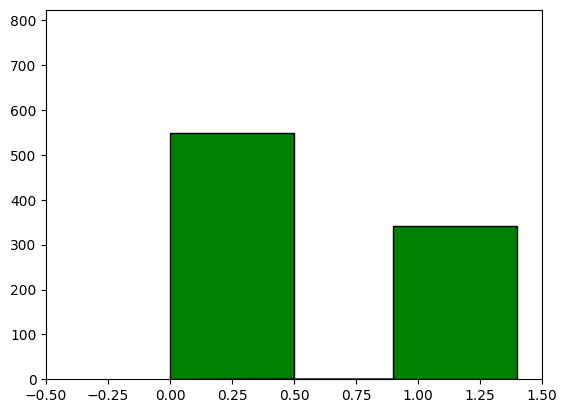

In [ ]:
fix, ax = plt.subplots()
ax.hist(df.Survived, edgecolor='k',color='g', width=0.5)
ax.margins(0.5)
ax.set_xlim(auto=True)
plt.plot()

[]

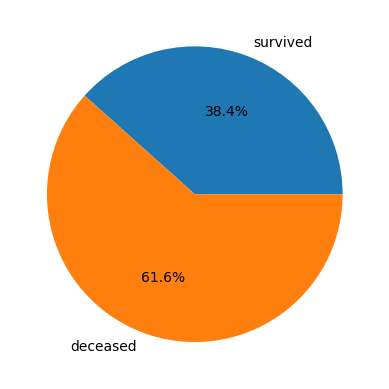

In [ ]:
deceased = df.Survived[df.survived_cat == 'Deceased'].shape[0]
survived = df.Survived[df.survived_cat == 'Survived'].shape[0]
data = [survived, deceased]
labels = ['survived', 'deceased']
fix, ax = plt.subplots()
ax.pie(data, labels=labels, autopct='%1.1f%%')
plt.plot()

Pclass - класс круиза, категориальный признак. Нас здесь интересует количество уникальных признаков и часто и редко встречающиеся признаки.

In [ ]:
len(df.Pclass.unique()) #  число уникальных элементов

3

In [ ]:
pclass_value_counts = df.Pclass.value_counts()
f'Часто встречающийся класс круиза - {pclass_value_counts.idxmax()}, редко - {pclass_value_counts.idxmin()}'

'Часто встречающийся класс круиза - 3, редко - 2'

[]

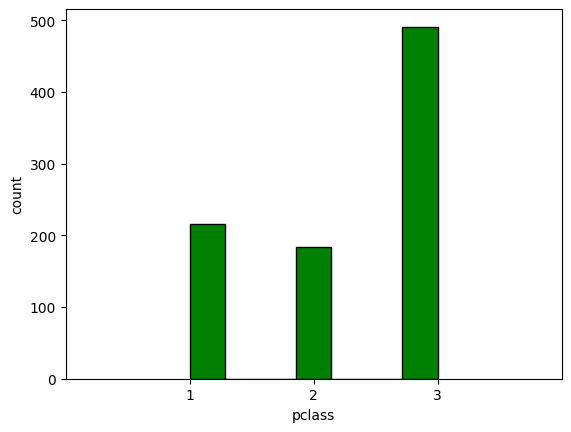

In [ ]:
fix, ax = plt.subplots()
ax.hist(df.Pclass, edgecolor='k',color='g', bins='scott')
ax.set(xlim=(0, 4), xticks=np.arange(1, 4))
ax.set_xlabel('pclass')
ax.set_ylabel('count')
plt.plot()

<ipython-input-114-54dbf4886cb5>:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for pclass, items in df.groupby(by=['Pclass']):


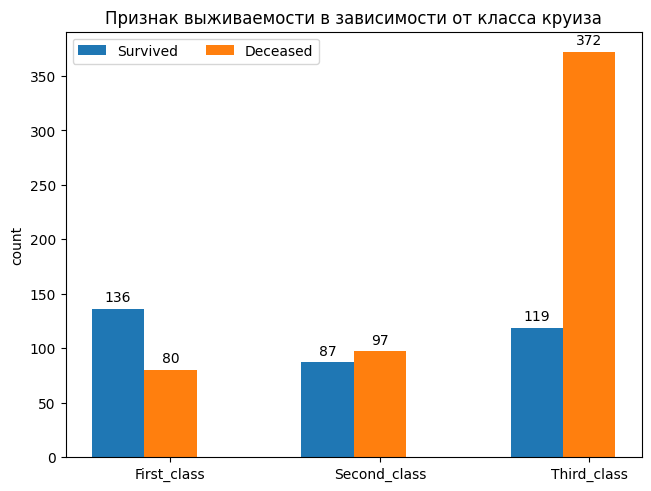

In [ ]:
classes = {1: 'First_class', 2: 'Second_class', 3: 'Third_class'}
survived_s = {'Survived': [], 'Deceased': []}
for pclass, items in df.groupby(by=['Pclass']):
    count0 = items[items['Survived'] == 0]['Survived'].count()
    count1 = items[items['Survived'] == 1]['Survived'].count()
    survived_s['Deceased'].append(count0)
    survived_s['Survived'].append(count1)

x = np.arange(len(classes))
width = 0.25
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in survived_s.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('count')
ax.set_title('Признак выживаемости в зависимости от класса круиза')
ax.set_xticks(x + width, classes.values())
ax.legend(loc='upper left', ncols=2)

plt.show()

Name - имя пассажира, в принципе количество уникальных значений может быть большим. Интересно будет это проанализировать

In [ ]:
len(df.Name.unique()) #  число уникальных элементов

891

Число уникальных элементов равно общему числу элементов поэтому нет интереса смотреть на статистику по именам. Можно посмотреть на статистику по первой букве имени.

In [ ]:
df['first_letter'] = df['Name'].apply(lambda x: x[0].upper())

In [ ]:
len(df.first_letter.unique()) # в принципе равно количеству букв в латинском алфавите

25

In [ ]:
first_letter_value_counts = df.first_letter.value_counts()
f'Часто встречающийся первая буква имени - {first_letter_value_counts.idxmax()}, редко - {first_letter_value_counts.idxmin()}'

'Часто встречающийся первая буква имени - S, редко - U'

Sex - Пол. Количество уникальных значений 2, можно к чатгпт не ходить. Посмотрим на статистику.

In [ ]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

Мужчин было больше, женжин меньше. Посмотрим статистику среди выживших

In [ ]:
df[df.Survived == 1].Sex.value_counts()

female    233
male      109
Name: Sex, dtype: int64

In [148]:
def plot_bar_by_survived(colname, plot_title, figsize=(16, 10)):
    classes = []
    survived_s = {'Survived': [], 'Deceased': []}
    for pclass, items in df.groupby(by=[colname]):
        count0 = items[items['Survived'] == 0]['Survived'].count()
        count1 = items[items['Survived'] == 1]['Survived'].count()
        survived_s['Deceased'].append(count0)
        survived_s['Survived'].append(count1)
        classes.append(pclass)

    x = np.arange(len(classes))
    width = 0.25
    multiplier = 0

    fig, ax = plt.subplots(layout='constrained', figsize=figsize)

    for attribute, measurement in survived_s.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute)
        ax.bar_label(rects, padding=len(classes))
        multiplier += 1

    ax.set_ylabel('count')
    ax.set_title(plot_title)
    ax.set_xticks(x + width, classes)
    ax.legend(loc='upper left')

    plt.show()

<ipython-input-148-a0da9d5b6e18>:4: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for pclass, items in df.groupby(by=[colname]):


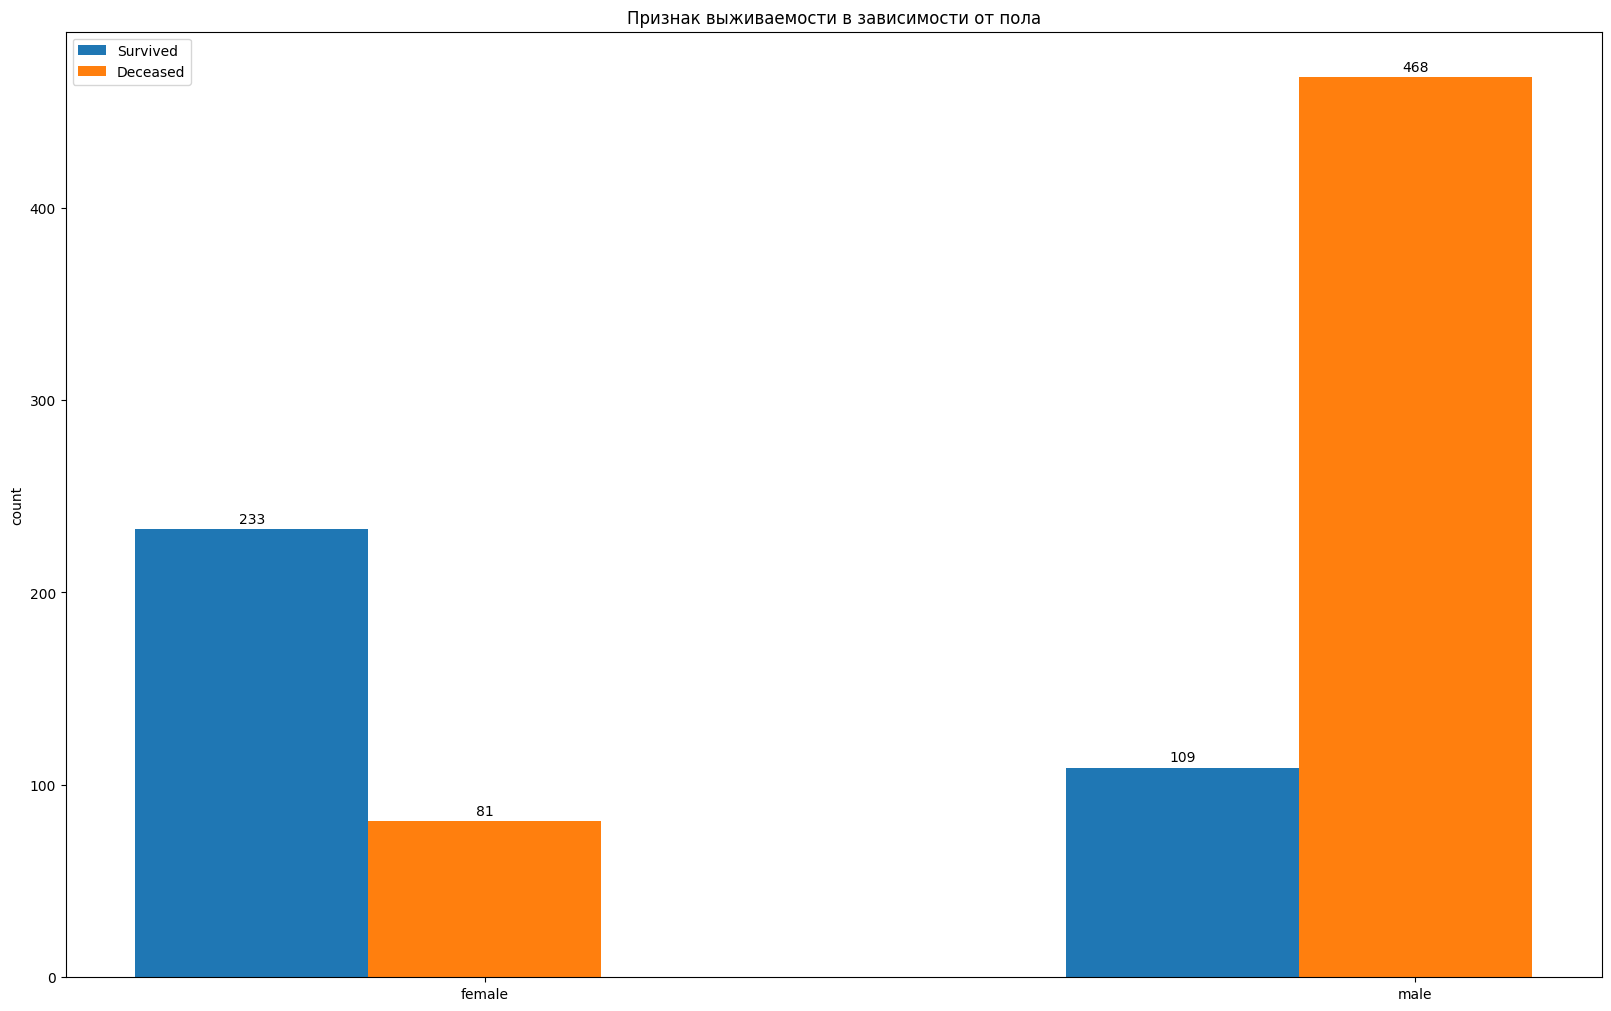

In [149]:
plot_bar_by_survived('Sex', 'Признак выживаемости в зависимости от пола')

Женщин выжило больше, чем мужчин в два раза.

Age - возраст.

In [ ]:
len(df.Age.unique())

88

In [ ]:
age_value_counts = df.Age.value_counts()
f'Часто встречающийся возраст - {age_value_counts.idxmax()}, редко - {age_value_counts.idxmin()}'

'Часто встречающийся возраст - 30.0, редко - 34.5'

In [ ]:
f'максимальный возраст {df.Age.max()}'

'максимальный возраст 80.0'

In [ ]:
f'минимальный возраст {df.Age.min()}'

'минимальный возраст 0.42'

In [151]:
def extract_age_groups(age):
    lower_bound, upper_bound = int(math.floor(age / 10) * 10), int(math.ceil(age / 10) * 10)
    upper_bound = upper_bound + 10 if lower_bound == upper_bound else upper_bound
    return f'[{lower_bound}, {upper_bound})'
df['age_groups'] = df.Age.apply(extract_age_groups)

<ipython-input-148-a0da9d5b6e18>:4: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for pclass, items in df.groupby(by=[colname]):


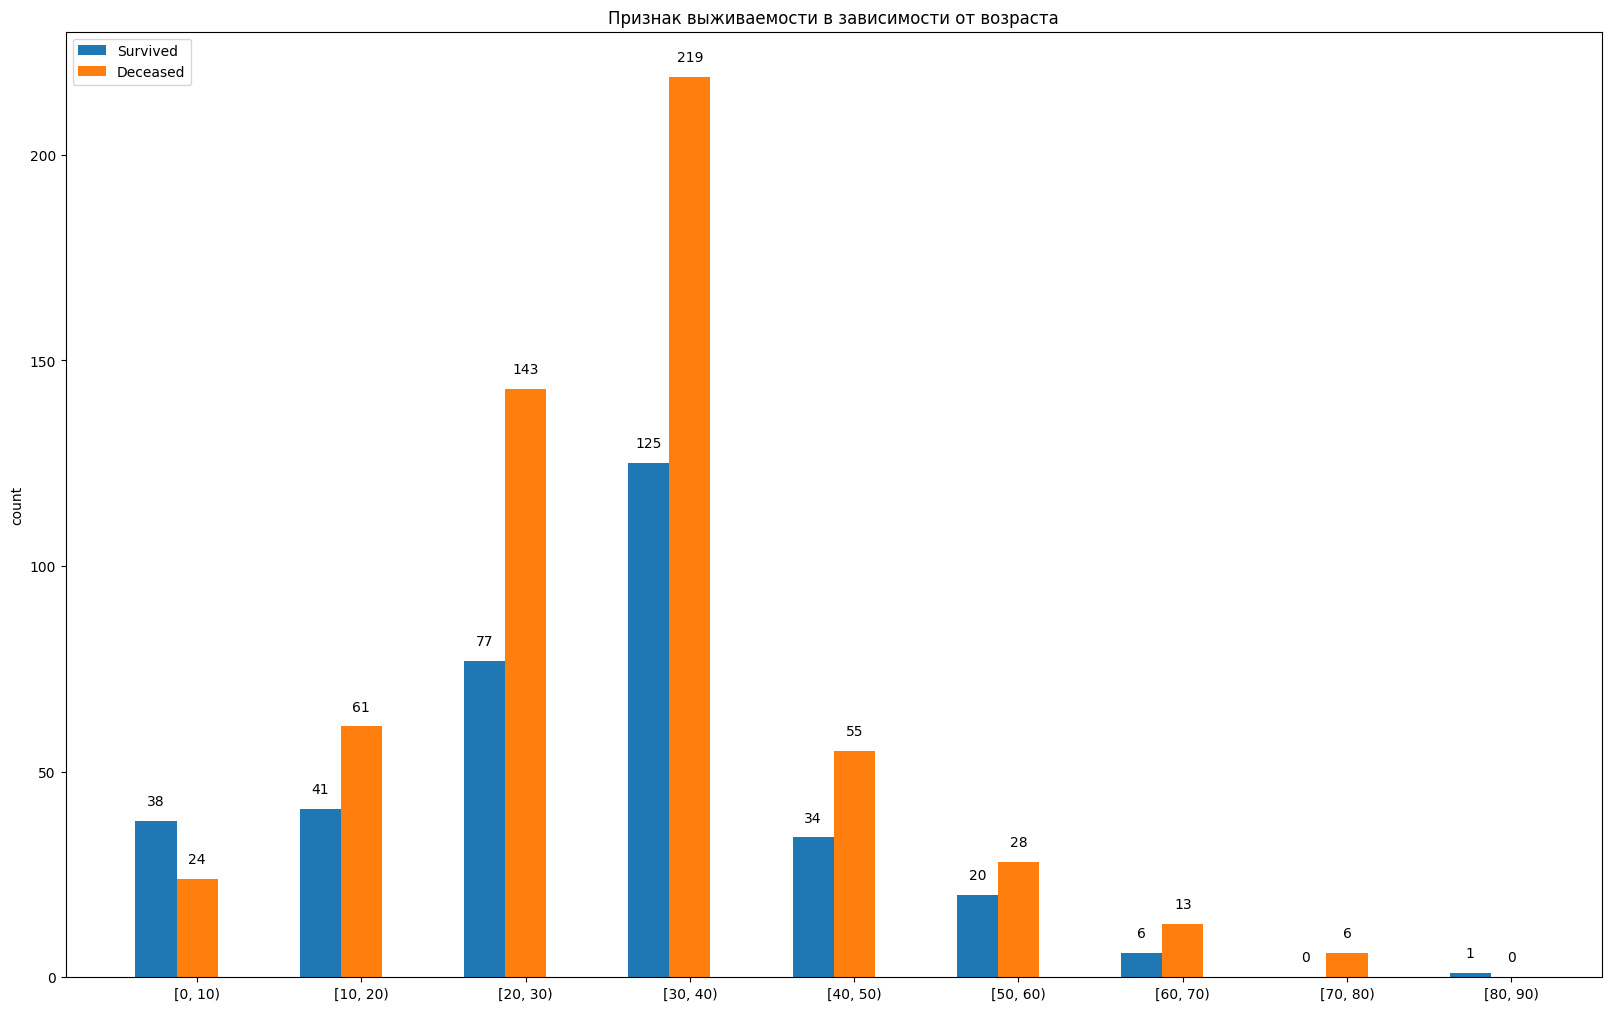

In [152]:
plot_bar_by_survived('age_groups', 'Признак выживаемости в зависимости от возраста')

In [160]:
def plot_box_by_survived(colname, title):
    values = []
    survived = []
    for survive, items in df.groupby(by=['Survived']):
        survived.append(survive)
        values.append(items[colname])
    plt.boxplot(x=values, patch_artist=True, labels=survived, showmeans=True,
                meanprops={'linestyle': '--', 'color': 'orange'})
    plt.xlabel('Survived')
    plt.ylabel(colname)
    plt.title(title)
    plt.show()

<ipython-input-160-bc057cbb1383>:4: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for survive, items in df.groupby(by=['Survived']):


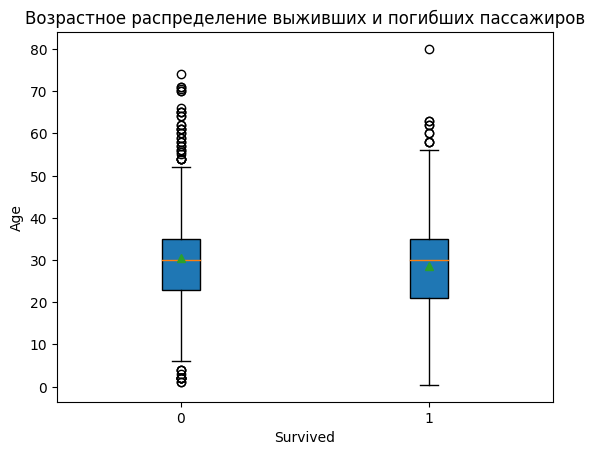

In [161]:
plot_box_by_survived('Age', 'Возрастное распределение выживших и погибших пассажиров')

SibSp - число братьев, сестер или супругов на борту у человека.

In [ ]:
len(df.SibSp.unique())

7

In [ ]:
sib_sp_value_counts = df.SibSp.value_counts()
f'Часто встречающееся количество братьев, сестер или супругов на борту у чела - {sib_sp_value_counts.idxmax()}, редко - {sib_sp_value_counts.idxmin()}'

'Часто встречающееся количество братьев, сестер или супругов на борту у чела - 0, редко - 5'

In [ ]:
print(f'максимальное количество {df.SibSp.max()}')

максимальное количество 8


In [ ]:
print(f'минимальное количество {df.SibSp.min()}')

минимальное количество 0


<ipython-input-148-a0da9d5b6e18>:4: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for pclass, items in df.groupby(by=[colname]):


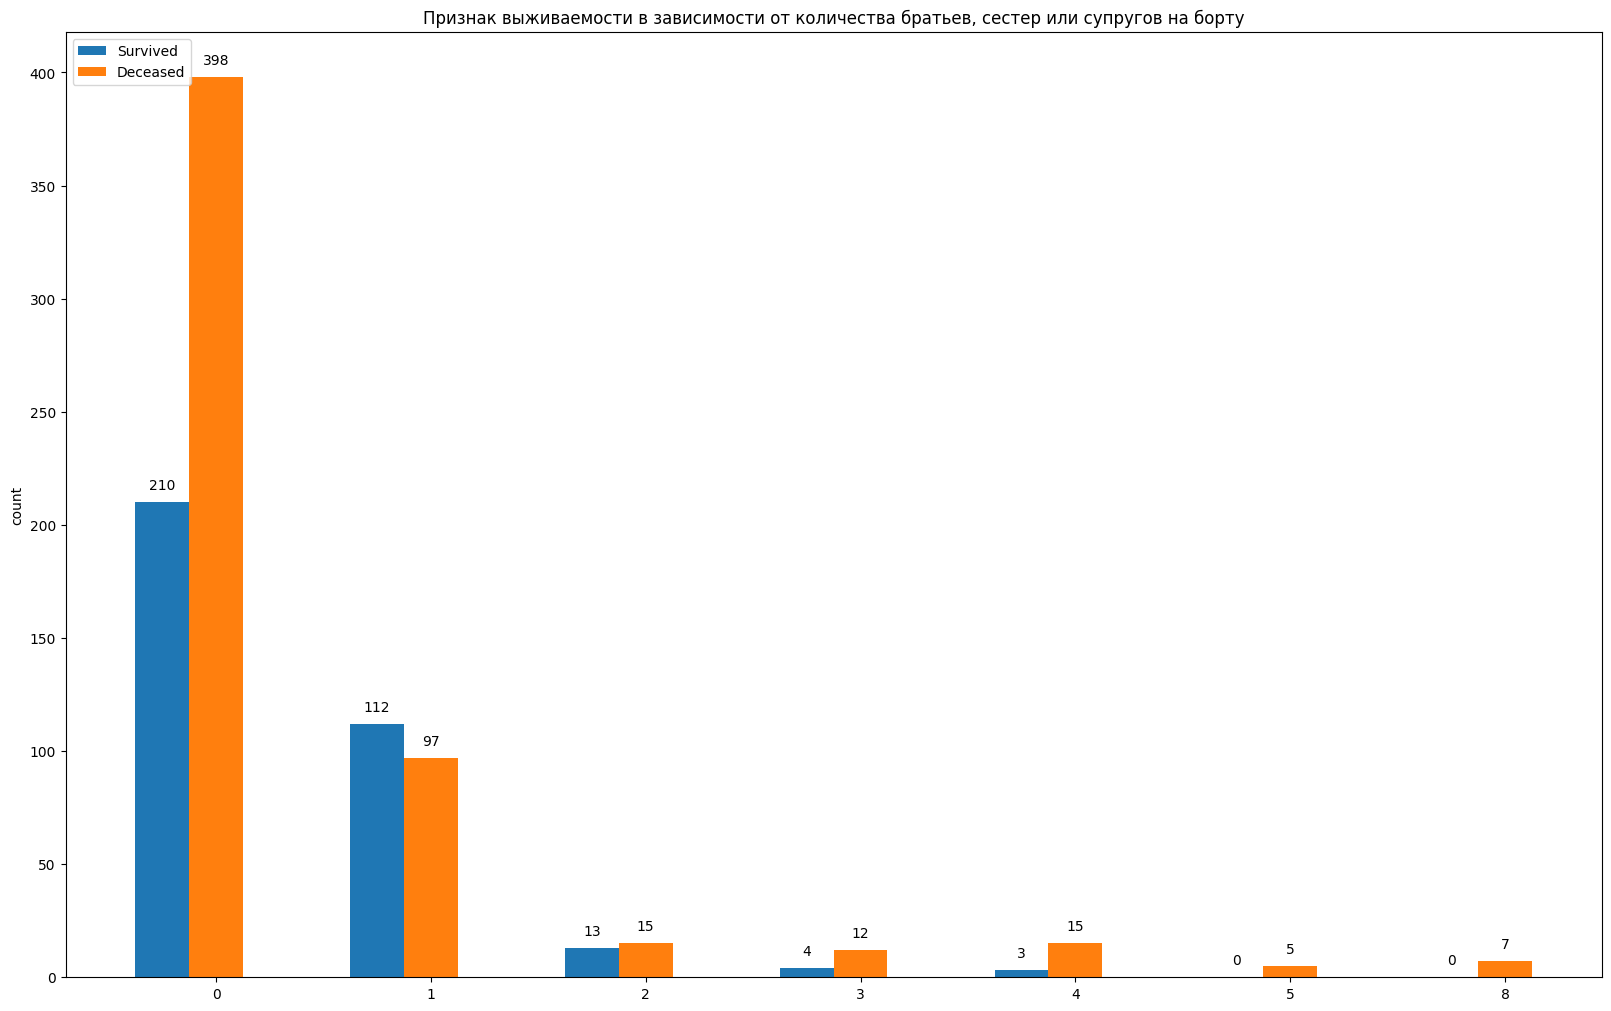

In [153]:
plot_bar_by_survived('SibSp', 'Признак выживаемости в зависимости от количества братьев, сестер или супругов на борту')

<ipython-input-160-bc057cbb1383>:4: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for survive, items in df.groupby(by=['Survived']):


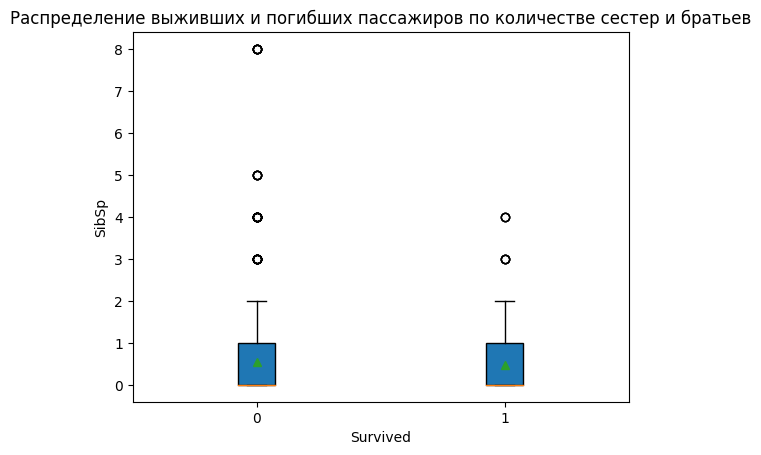

In [162]:
plot_box_by_survived('SibSp', 'Распределение выживших и погибших пассажиров по количестве сестер и братьев')

Parch - количество родителей или детей.

In [ ]:
len(df.Parch.unique())

7

In [ ]:
parch_value_counts = df.Parch.value_counts()
print(f'Часто встречающееся число родителей или детей - {parch_value_counts.idxmax()}, редко - {parch_value_counts.idxmin()}')

Часто встречающееся число родителей или детей - 0, редко - 6


In [ ]:
print(f'максимальное количество {df.Parch.max()}')

максимальное количество 6


In [ ]:
print(f'минимальное количество {df.Parch.min()}')

минимальное количество 0


<ipython-input-148-a0da9d5b6e18>:4: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for pclass, items in df.groupby(by=[colname]):


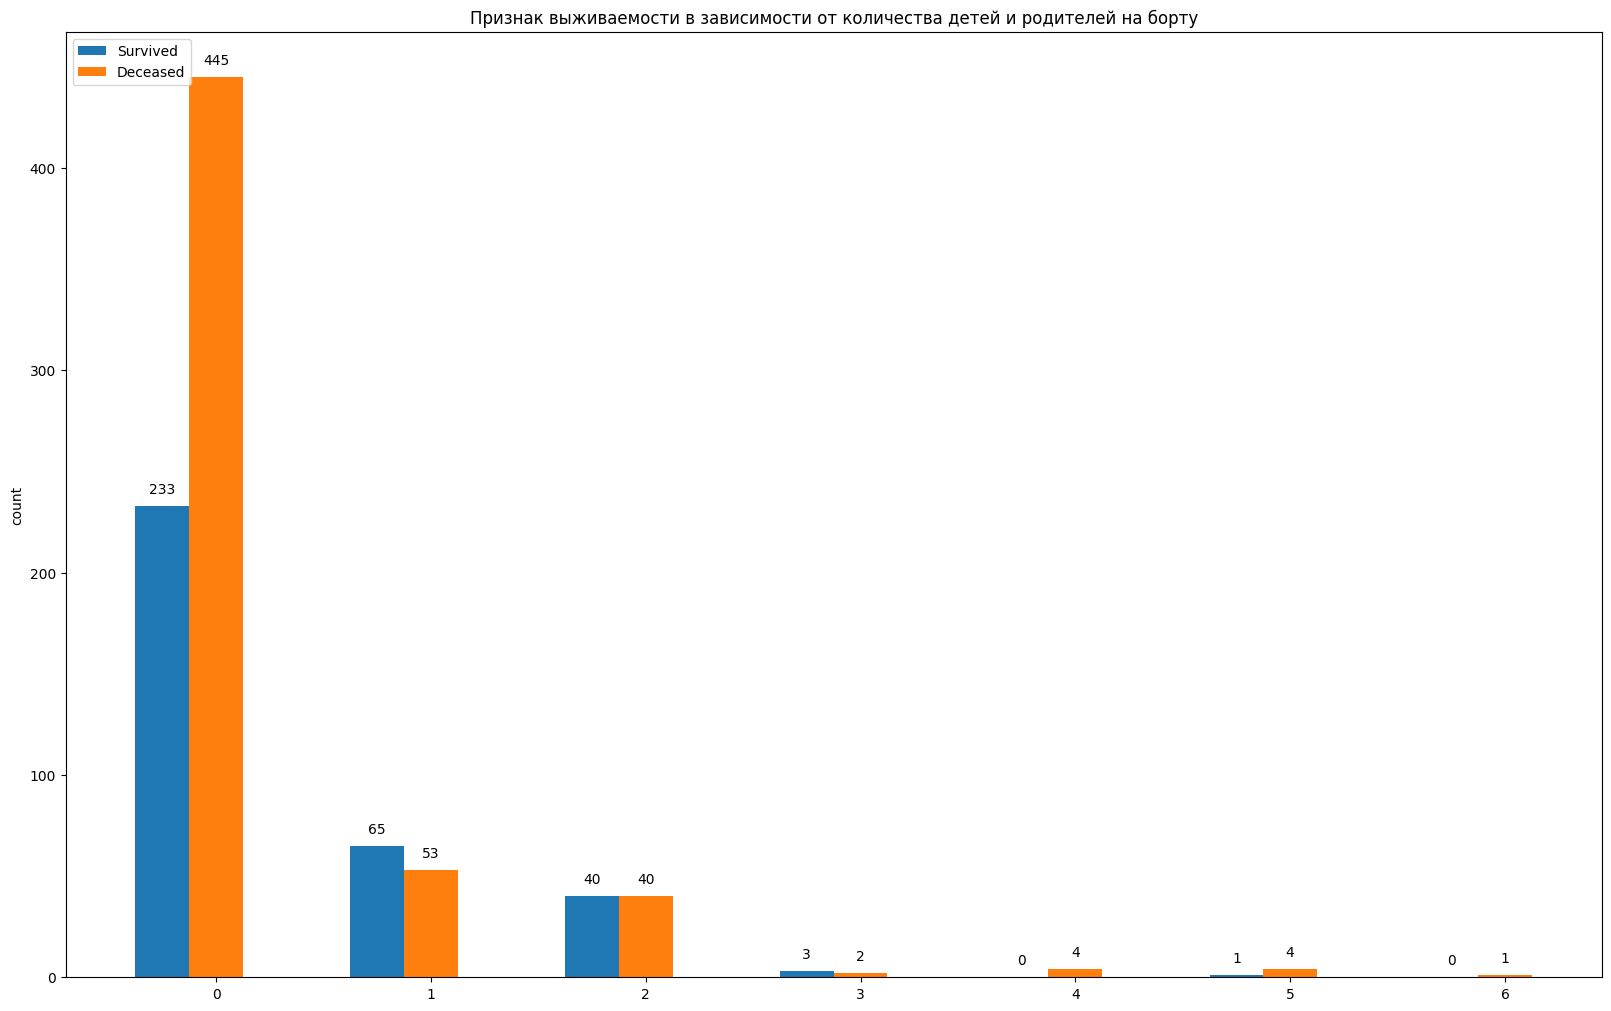

In [154]:
plot_bar_by_survived('Parch', 'Признак выживаемости в зависимости от количества детей и родителей на борту')

<ipython-input-160-bc057cbb1383>:4: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for survive, items in df.groupby(by=['Survived']):


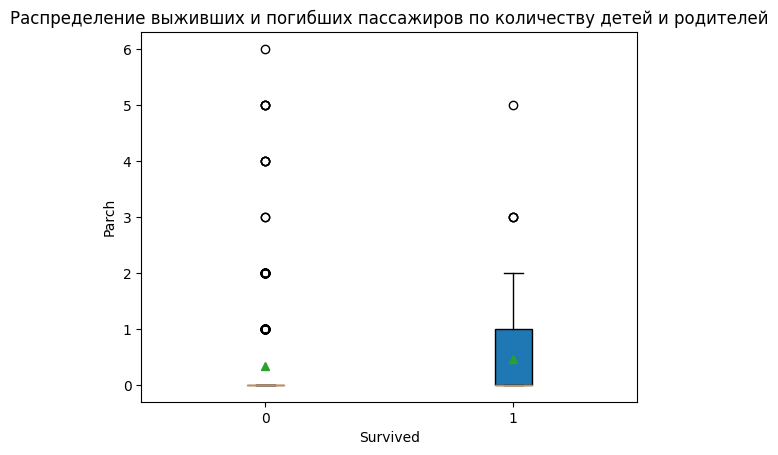

In [164]:
plot_box_by_survived('Parch', 'Распределение выживших и погибших пассажиров по количеству детей и родителей')

Ticket - номер билета

In [ ]:
len(df.Ticket.unique())

681

In [ ]:
ticket_value_counts = df.Ticket.value_counts()
print(f'Часто встречающийся билет - {ticket_value_counts.idxmax()}, редко - {ticket_value_counts.idxmin()}')

Часто встречающийся билет - 347082, редко - STON/O 2. 3101273


Посмотрим что это за билеты. Часто встречающийся - видимо большая семья.

In [ ]:
df[df.Ticket == '347082']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,first_letter
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.275,unknown,S,A
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.275,unknown,S,A
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.275,unknown,S,A
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.275,unknown,S,A
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.275,unknown,S,A
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.275,unknown,S,A
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.275,unknown,S,A


In [ ]:
df[df.Ticket == 'STON/O 2. 3101273']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,first_letter
590,591,0,3,"Rintamaki, Mr. Matti",male,35.0,0,0,STON/O 2. 3101273,7.125,unknown,S,R


Fare - цена билета.

In [ ]:
len(df.Fare.unique())

248

In [ ]:
df.Fare.max()

512.3292

In [ ]:
df.Fare.min()

0.0

<ipython-input-160-bc057cbb1383>:4: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for survive, items in df.groupby(by=['Survived']):


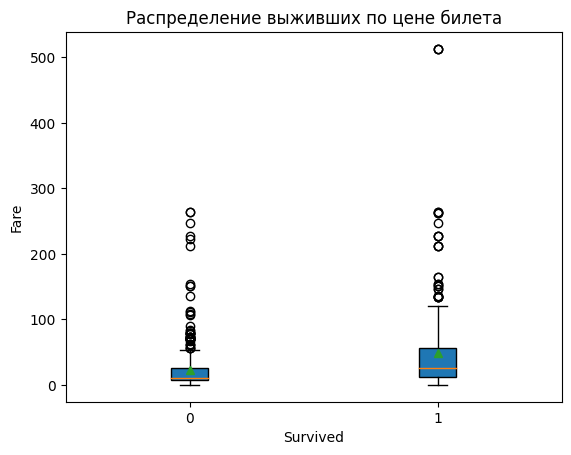

In [165]:
plot_box_by_survived('Fare', 'Распределение выживших по цене билета')

Выжило больше тех, кто потратил больше денег за билет

Cabin - номер каюты. Много пропусков было в этом признаке, поэтому часто встречающееся значение это unknown. Посмотрим аналитику без этого значения

In [ ]:
cabins = df[df.Cabin != 'unknown'].Cabin
len(cabins.unique())

147

In [ ]:
cabins_value_counts = cabins.value_counts()
print(f'Часто встречающийся каюта - {cabins_value_counts.idxmax()}, редко - {cabins_value_counts.idxmin()}')

Часто встречающийся билет - B96 B98, редко - C70


In [ ]:
df[df.Cabin == 'B96 B98']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,first_letter
390,391,1,1,"Carter, Mr. William Ernest",male,36.0,1,2,113760,120.0,B96 B98,S,C
435,436,1,1,"Carter, Miss. Lucile Polk",female,14.0,1,2,113760,120.0,B96 B98,S,C
763,764,1,1,"Carter, Mrs. William Ernest (Lucile Polk)",female,36.0,1,2,113760,120.0,B96 B98,S,C
802,803,1,1,"Carter, Master. William Thornton II",male,11.0,1,2,113760,120.0,B96 B98,S,C


Embarked - номер порта

In [ ]:
len(df.Embarked.unique())

3

In [ ]:
embarked_value_counts = df.Embarked.value_counts()
print(f'Часто встречающийся порт - {embarked_value_counts.idxmax()}, редко - {embarked_value_counts.idxmin()}')

Часто встречающийся порт - S, редко - Q


<ipython-input-148-a0da9d5b6e18>:4: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for pclass, items in df.groupby(by=[colname]):


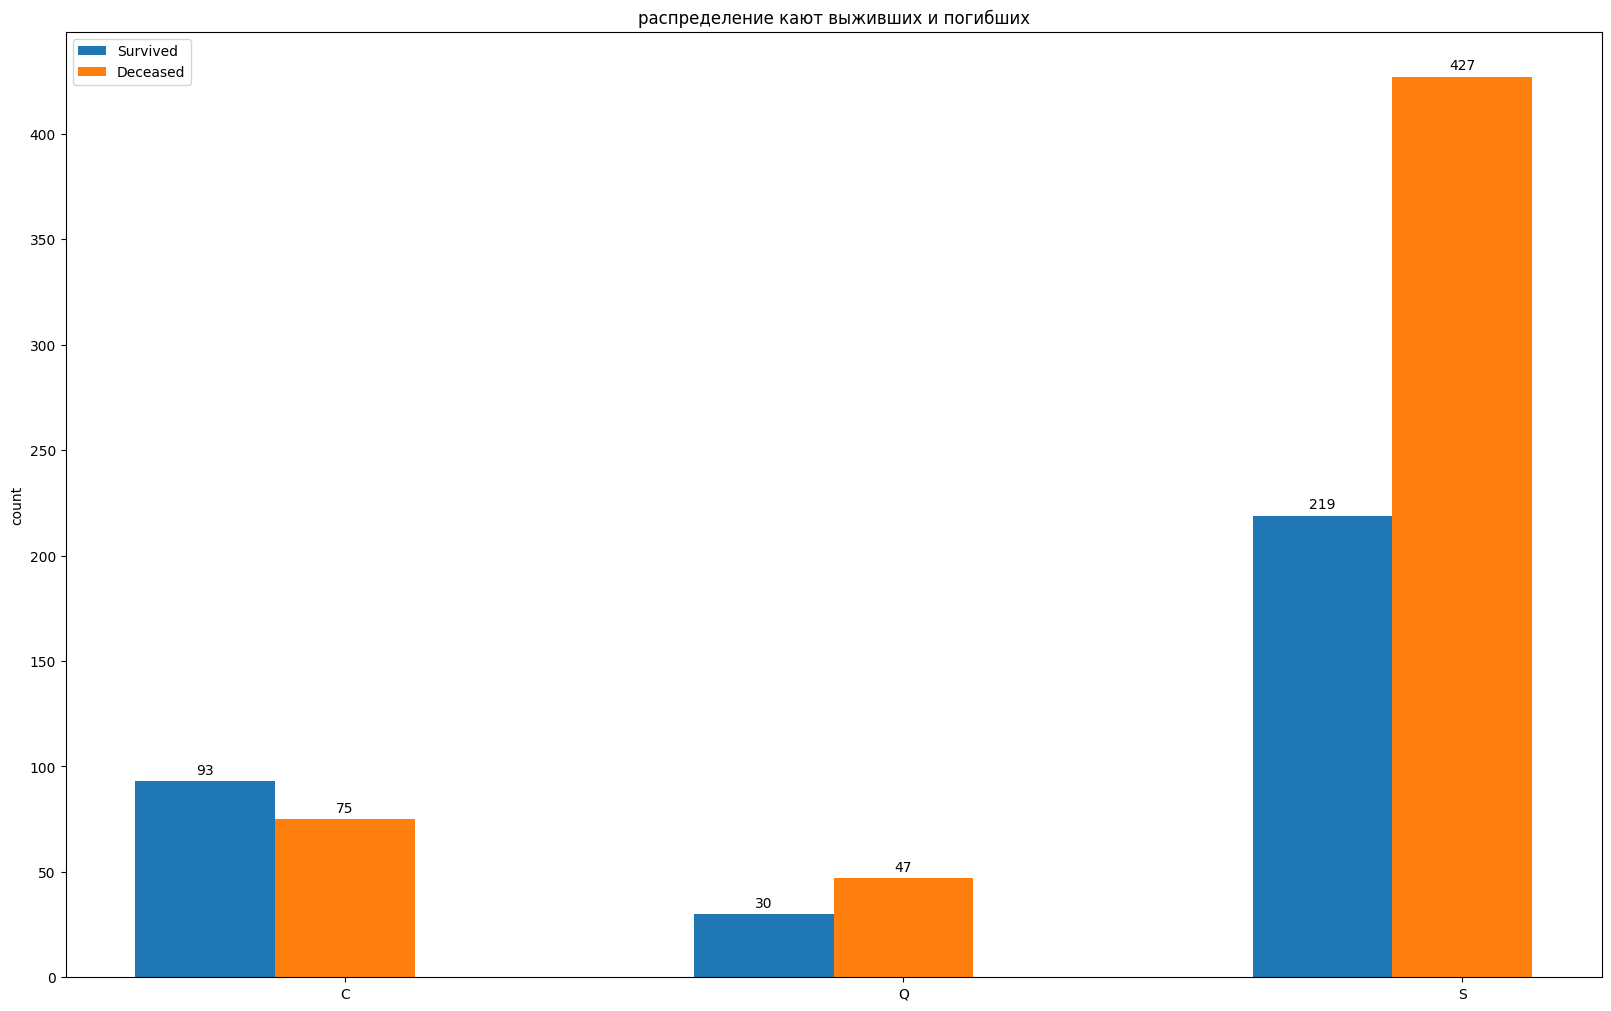

In [166]:
plot_bar_by_survived('Embarked', 'распределение кают выживших и погибших')

## Аналитика по выживаемости
Меняем информативные признаки на численные аналоги и строим матрицу корреляций.

In [ ]:
df['sex_numeric'] = df['Sex'].apply(lambda x: 0 if x == 'female' else 1)

In [ ]:
df.drop('PassengerId', inplace=True, axis=1)

In [ ]:
df.corr(numeric_only=True)

,Survived,Pclass,Age,SibSp,Parch,Fare,sex_numeric
Survived,1.000000,-0.338481,-0.070657,-0.035322,0.081629,0.257307,-0.543351
Pclass,-0.338481,1.000000,-0.329727,0.083081,0.018443,-0.549500,0.131900
Age,-0.070657,-0.329727,1.000000,-0.232440,-0.180330,0.090632,0.084660
SibSp,-0.035322,0.083081,-0.232440,1.000000,0.414838,0.159651,-0.114631
Parch,0.081629,0.018443,-0.180330,0.414838,1.000000,0.216225,-0.245489
Fare,0.257307,-0.549500,0.090632,0.159651,0.216225,1.000000,-0.182333
sex_numeric,-0.543351,0.131900,0.084660,-0.114631,-0.245489,-0.182333,1.000000


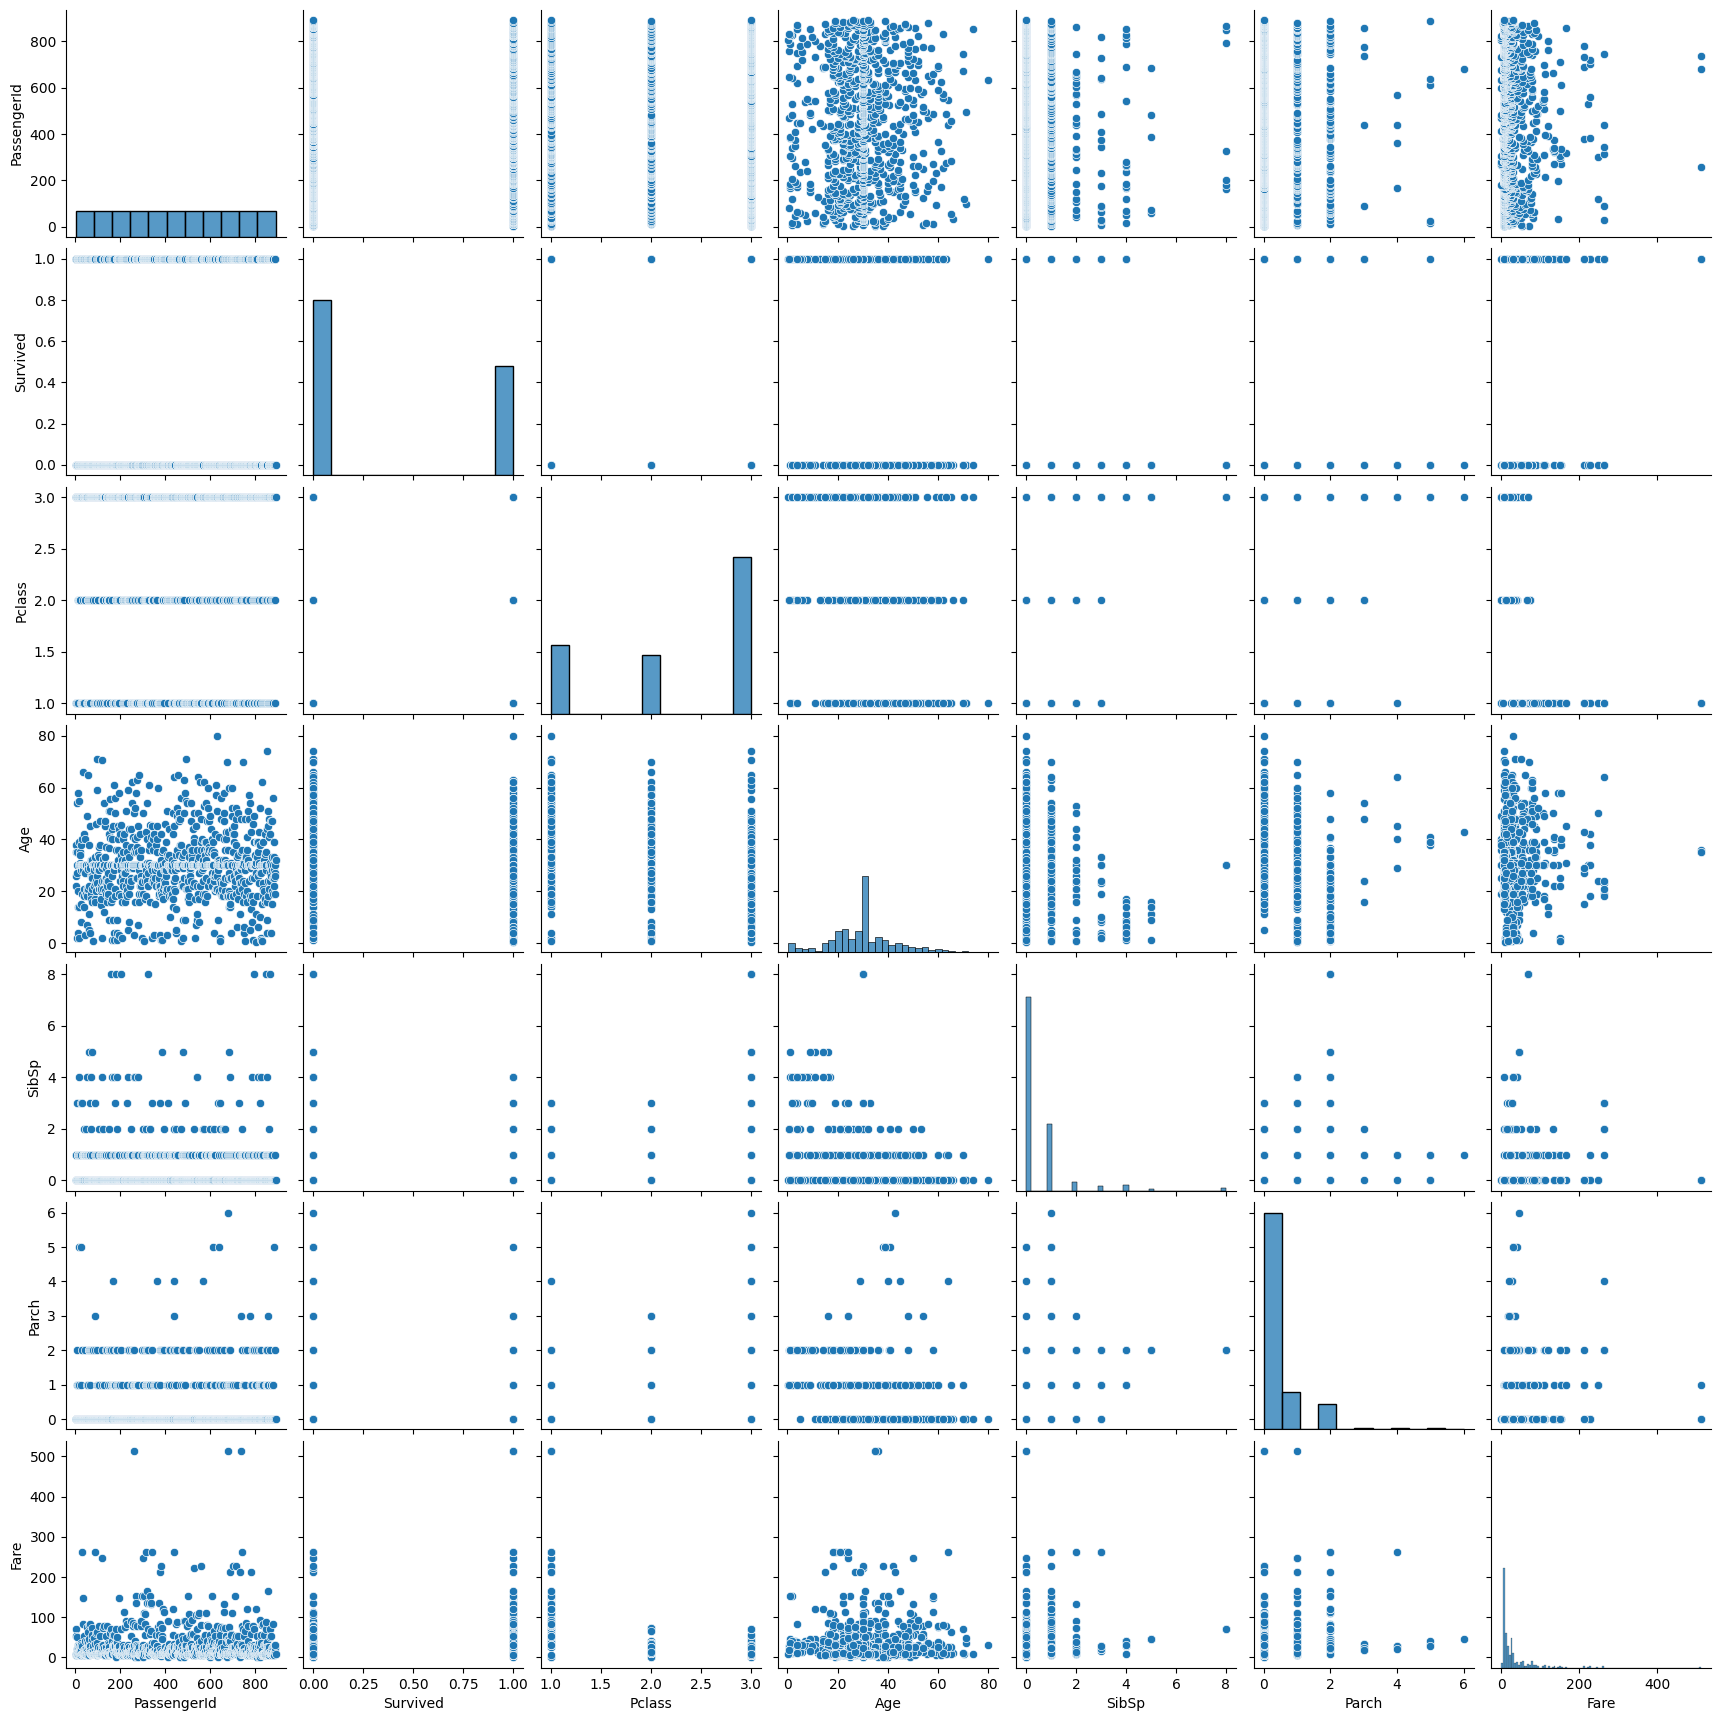

In [167]:
import seaborn as sns

sns.pairplot(df)

Видим значительные корреляции признака выживаемости с полом (мужчины жертвовали собой ради женщин, наверно), положительная корреляция с ценой билета (богатенькие имели больше влияния на место в шлюпке), Pclass и зависимость от класса круиза, аналогично Fare